In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta
from datetime import time as t
%matplotlib inline

In [255]:
df = pd.read_csv('sheets\\activities.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [256]:
# convert 'activity date' to datetime format
df['Activity Date'] = pd.to_datetime(df['Activity Date'])


In [257]:
# function to adjust 'activity date' for time zone/regional hangup
def adjust_timestamp(timestamp):
    if (timestamp.month > 3 and timestamp.month < 11) or (timestamp.month == 3 and timestamp.day >= 12) or (timestamp.month == 11 and timestamp.day <= 5):
        return timestamp - timedelta(hours=4)
    else:
        return timestamp - timedelta(hours=5)
    
df['Activity Date'] = df['Activity Date'].apply(adjust_timestamp)    

In [258]:
speed_trap = []
for index, row in df.iterrows():
    if row['Max Speed'] < row['Average Speed']:
        speed_trap.append(True)
    else: 
        pass

print(len(speed_trap))

0


In [259]:
move_list = ['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Moving Time', 'Distance',
       'Max Speed', 'Average Speed', 'Elevation Gain',
       'Elevation Loss', 'Elevation Low', 'Elevation High','Calories', 'Athlete Weight']

        
weather_list = ['Activity ID','Weather Observation Time', 'Max Temperature','Average Temperature'
       'Weather Condition', 'Weather Temperature', 'Apparent Temperature',
       'Dewpoint', 'Humidity', 'Weather Pressure', 'Wind Speed',
       'Wind Gust', 'Wind Bearing', 'Precipitation Intensity',
       'Sunrise Time', 'Sunset Time', 'Moon Phase','Precipitation Probability', 'Precipitation Type', 'Cloud Cover', 'Weather Visibility' ,'UV Index']

dates_list = ['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type']

In [260]:
# move_df = df.copy()
move_df = (df[move_list]).copy()
move_df.isna().sum()

Activity ID               0
Activity Date             0
Activity Name             0
Activity Type             0
Activity Description    717
Elapsed Time              0
Moving Time               0
Distance                  0
Max Speed                32
Average Speed           309
Elevation Gain           78
Elevation Loss          338
Elevation Low           168
Elevation High          168
Calories                 32
Athlete Weight          539
dtype: int64

In [261]:
move_df.sample()


,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Moving Time,Distance,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories,Athlete Weight
588,5687692956,2021-07-25 18:56:22,Bicicleta al anochecer,Ride,NaN,6021,5938.0,41.23,14.2,6.943617,312.0,324.0,258.799988,316.600006,1817.0,NaN


In [262]:
#  format 'elapsed time'
move_df['Elapsed Time'] = pd.to_timedelta(move_df['Elapsed Time'], unit='s').astype(str).str[7:]
# format 'moving time'
move_df['Moving Time'] = pd.to_timedelta(move_df['Moving Time'], unit='s').astype(str).str[7:]


# format 'elapsed time'
# move_df['Elapsed Time'] = move_df['Elapsed Time'].astype(str).str[7:]
# # format 'moving time'
# move_df['Moving Time'] = move_df['Moving Time'].astype(str).str[7:]


# move_df['Elapsed Time'] = pd.to_datetime(move_df['Elapsed Time'])
# move_df['Moving Time'] = pd.to_datetime(move_df['Moving Time'])

In [263]:
# convert distance from km to mile
km_mi = 0.621371
move_df['Distance'] = (move_df['Distance']*km_mi).round(2)

In [264]:
# convert meters to feet (all elevation columns)
meter_feet = 3.28084
move_df['Elevation Gain'] = (move_df['Elevation Gain']*meter_feet).round(2)
move_df['Elevation Loss'] = (move_df['Elevation Loss']*meter_feet).round(2)
move_df['Elevation High'] = (move_df['Elevation High']*meter_feet).round(2)
move_df['Elevation Low'] = (move_df['Elevation Low']*meter_feet).round(2)


In [265]:
# to to_timedelta for a couple columns
move_df["Elapsed Time"] = pd.to_timedelta(move_df['Elapsed Time'])
move_df["Moving Time"] = pd.to_timedelta(move_df['Moving Time'])
move_df.dtypes

Activity ID                       int64
Activity Date            datetime64[ns]
Activity Name                    object
Activity Type                    object
Activity Description             object
Elapsed Time            timedelta64[ns]
Moving Time             timedelta64[ns]
Distance                        float64
Max Speed                       float64
Average Speed                   float64
Elevation Gain                  float64
Elevation Loss                  float64
Elevation Low                   float64
Elevation High                  float64
Calories                        float64
Athlete Weight                  float64
dtype: object

In [266]:
# conversion factor for speed
mph = 0.621371

# convert max
move_df['Max Speed'] = (move_df['Max Speed']/mph)

# recalculate average speed  # distance/moving time
move_df['Average Speed'] = move_df['Distance'] /(move_df['Moving Time'].dt.total_seconds()/3600)


In [267]:
# round calories value
move_df['Calories'] = (move_df['Calories']).round()

In [268]:
move_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Activity ID           924 non-null    int64          
 1   Activity Date         924 non-null    datetime64[ns] 
 2   Activity Name         924 non-null    object         
 3   Activity Type         924 non-null    object         
 4   Activity Description  207 non-null    object         
 5   Elapsed Time          924 non-null    timedelta64[ns]
 6   Moving Time           924 non-null    timedelta64[ns]
 7   Distance              924 non-null    float64        
 8   Max Speed             892 non-null    float64        
 9   Average Speed         924 non-null    float64        
 10  Elevation Gain        846 non-null    float64        
 11  Elevation Loss        586 non-null    float64        
 12  Elevation Low         756 non-null    float64        
 13  Eleva

In [269]:
move_df.sample()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Moving Time,Distance,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories,Athlete Weight
78,947831113,2017-04-18 13:58:02,Carrera de noche,Run,Siempre hay que grabar desde la salida 😳,0 days 00:10:15,0 days 00:10:15,1.49,8.368591,8.721951,33.73,NaN,-5.91,78.41,246.0,83.0


In [270]:
# to see how many max speed values are actually less than average speed
# this will require more investigation
# but likely due to NaN values in the Max Speed column
speed_trap = []
for index, row in move_df.iterrows():
    if row['Max Speed'] < row['Average Speed']:
        speed_trap.append(True)
    else: 
        pass

print(len(speed_trap))

76


In [271]:
# creating a revert
checkpoint_move_df = move_df.copy()

In [272]:
# this means that only 32 of 76 Max Speed values are null, but 
move_df['Max Speed'].isnull().sum()

32

In [273]:
move_df.dropna(subset=['Max Speed'],inplace=True)
move_df.shape

(892, 16)

In [274]:
move_df['Max Speed'].isnull().sum()

0

In [275]:
move_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Activity ID           892 non-null    int64          
 1   Activity Date         892 non-null    datetime64[ns] 
 2   Activity Name         892 non-null    object         
 3   Activity Type         892 non-null    object         
 4   Activity Description  201 non-null    object         
 5   Elapsed Time          892 non-null    timedelta64[ns]
 6   Moving Time           892 non-null    timedelta64[ns]
 7   Distance              892 non-null    float64        
 8   Max Speed             892 non-null    float64        
 9   Average Speed         892 non-null    float64        
 10  Elevation Gain        845 non-null    float64        
 11  Elevation Loss        586 non-null    float64        
 12  Elevation Low         756 non-null    float64        
 13  Eleva

In [276]:
move_df.sample()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Moving Time,Distance,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories,Athlete Weight
609,5905350039,2021-09-04 11:32:21,Fallen Komrad. RIP Chris 🥓🥓,Ride,NaN,0 days 01:33:39,0 days 01:15:08,11.32,29.772873,9.039929,1194.26,1180.48,1036.42,1316.6,1019.0,NaN


In [277]:
# move_df['Elapsed Time'] = move_df['Elapsed Time'].dt.total_seconds().apply(
#     lambda x: '{:02d}:{:02d}:{:02d}'.format(*divmod(int(x), 3600), *divmod(int(x) % 3600, 60))
# )

In [278]:
move_df.sample()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Moving Time,Distance,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Calories,Athlete Weight
98,1079097264,2017-07-11 18:54:26,Pedalada de noche,Ride,NaN,0 days 00:41:04,0 days 00:41:04,9.0,13.35756,13.149351,254.4,NaN,816.27,948.16,234.0,83.0


In [279]:
move_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Activity ID           892 non-null    int64          
 1   Activity Date         892 non-null    datetime64[ns] 
 2   Activity Name         892 non-null    object         
 3   Activity Type         892 non-null    object         
 4   Activity Description  201 non-null    object         
 5   Elapsed Time          892 non-null    timedelta64[ns]
 6   Moving Time           892 non-null    timedelta64[ns]
 7   Distance              892 non-null    float64        
 8   Max Speed             892 non-null    float64        
 9   Average Speed         892 non-null    float64        
 10  Elevation Gain        845 non-null    float64        
 11  Elevation Loss        586 non-null    float64        
 12  Elevation Low         756 non-null    float64        
 13  Eleva

In [280]:
# basic styling
sns.set(style="ticks")

In [281]:
# create object for total distance of all Strava activites 
all_dist_year = move_df.groupby(move_df['Activity Date'].dt.year)['Distance'].sum()


# create object for total distance of bik activites
bike_dist_year = move_df[move_df['Activity Type']=='Ride'].groupby(move_df['Activity Date'].dt.year)['Distance'].sum()


# create object for total distance of run activites 
run_dist_year = move_df[move_df['Activity Type']=='Run'].groupby(move_df['Activity Date'].dt.year)['Distance'].sum()
run_dist_year


Activity Date
2015      3.74
2016    157.40
2017    260.47
2018    112.65
2019     21.80
2020     26.76
2021     24.75
2022     47.28
2023      2.24
Name: Distance, dtype: float64

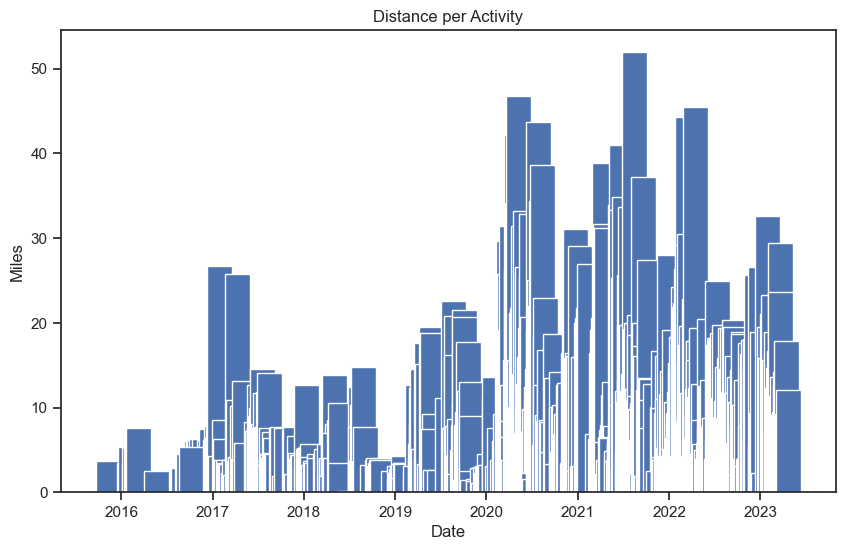

In [282]:
plt.figure(figsize=(10, 6))
plt.bar(move_df['Activity Date'], move_df['Distance'], 100)
plt.xlabel('Date')
plt.ylabel('Miles')
plt.title('Distance per Activity')
plt.show()

In [283]:
high_speed_index = move_df['Max Speed'].idxmax()
high_speed_index = move_df.drop(high_speed_index, inplace=True)

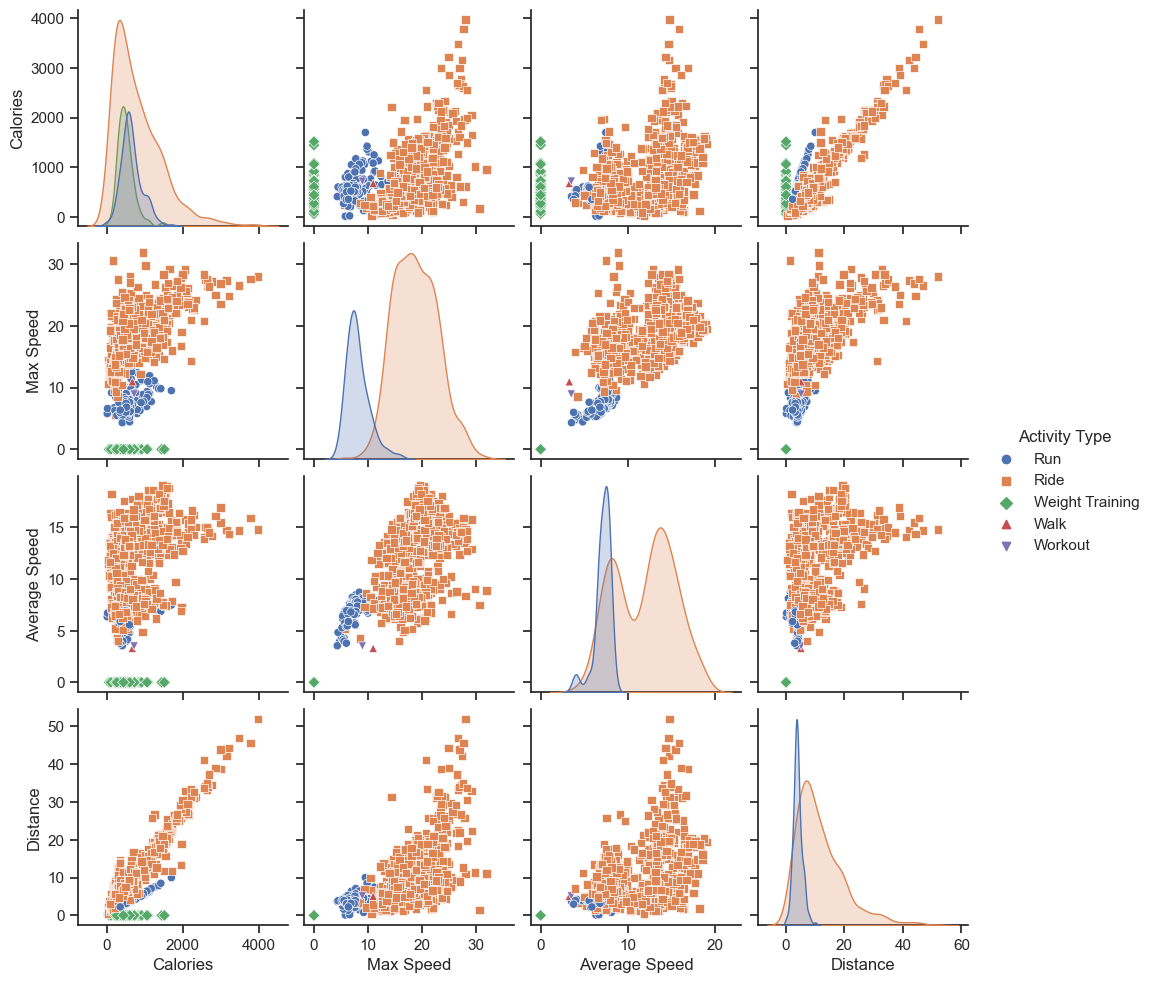

In [296]:
pair_list = ['Activity Date','Activity Type','Calories','Max Speed','Average Speed','Distance']
pair_df = move_df[pair_list]
sns.pairplot(pair_df, hue="Activity Type", markers=['o','s','D','^','v' ])